In [1]:
# install dependencies: 
!pip3 install pyyaml==5.1 'pycocotools>=2.0.1'
!pip3 install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

  Using cached https://files.pythonhosted.org/packages/9f/2c/9417b5c774792634834e730932745bc09a7d36754ca00acf1ccd1ac2594d/PyYAML-5.1.tar.gz
    100% |████████████████████████████████| 2.0MB 13.7MB/s ta 0:00:01
    100% |████████████████████████████████| 11.6MB 4.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/af/fa/c1302a26d5e1a17fa8e10e43417b6cf038b0648c4b79fcf2302a4a0c5d30/Pillow-8.0.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
    100% |████████████████████████████████| 14.5MB 3.4MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 29.7MB/s ta 0:00:01
  Running setup.py install for pyyaml ... done
You are using pip version 19.0.3, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Looking in links: https://download.pytorch.org/whl/torch_s

In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip3 install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html
    100% |████████████████████████████████| 6.6MB 6.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/c4/f4/770ae9385990f5a19a91431163d262182d3203662ea2b5739d0fcfc080f1/tabulate-0.8.7-py3-none-any.whl
    100% |████████████████████████████████| 71kB 5.5MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/33/d1/b1479a770f66d962f545c2101630ce1d5592d90cb4f083d38862e93d16d2/pydot-1.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/38/4f/fe9a4d472aa867878ce3bb7efb16654c5d63672b86dc0e6e953a67018433/yacs-0.1.8-py3-none-any.whl
    100% |████████████████████████████████| 10.6MB 4.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/89/a6/3814b7107e0788040870e8825eebf214d72166adf656ba7d4bf14759a06a/portalocker-2.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f2/f6/659da081a7c7c8f0

    100% |████████████████████████████████| 143kB 47.1MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/a3/12/b92740d845ab62ea4edf04d2f4164d82532b5a0b03836d4d4e71c6f3d379/requests_oauthlib-1.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/1e/a94a8d635fa3ce4cfc7f506003548d0a2447ae76fd5ca53932970fe3053f/pyasn1-0.4.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
tensorboard 2.4.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.
  Running setup.py install for fvcore ... done
You are using pip version 19.0.3, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
!pip install opencv-python

You are using pip version 19.0.3, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg
im = cv2.imread("/home/ubuntu/DeepFashion2/data/test/image/000003.jpg")

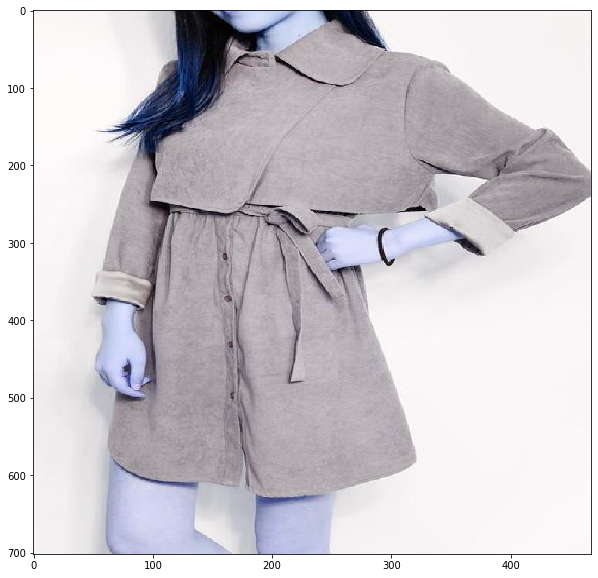

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
plt.imshow(im, interpolation='nearest', aspect='auto')
plt.show()

In [2]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

NameError: name 'im' is not defined

In [ ]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (15,10))
plt.imshow(out.get_image()[:, :, ::-1], interpolation='nearest')
plt.show()

In [2]:
from detectron2.data.datasets import register_coco_instances

In [3]:
register_coco_instances("train",
                        {}, "/home/ubuntu/DeepFashion2/deepfashion2_train_reduced.json",
                        "/home/ubuntu/DeepFashion2/data/train/image")
register_coco_instances("val",
                        {}, "/home/ubuntu/DeepFashion2/deepfashion2_validation_reduced.json",
                        "/home/ubuntu/DeepFashion2/data/validation/image")

In [31]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ()
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo

cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.01
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 5000
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

cfg.TEST.EVAL_PERIOD = 500

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[11/13 23:58:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[11/13 23:59:02 d2.data.datasets.coco]: Loading /home/ubuntu/DeepFashion2/deepfashion2_train_reduced.json takes 58.64 seconds.
[11/13 23:59:06 d2.data.datasets.coco]: Loaded 191961 images in COCO format from /home/ubuntu/DeepFashion2/deepfashion2_train_reduced.json
[11/13 23:59:42 d2.data.build]: Removed 0 images with no usable annotations. 191961 images left.
[11/13 23:59:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[11/13 23:59:50 d2.data.build]: Using training sampler TrainingSampler
[11/13 23:59:50 d2.data.common]: Serializing 191961 elements to byte tensors and concatenating them all ...
[11/14 00:00:04 d2.data.common]: Serialized dataset takes 2523.06 MiB
[11/14 00:00:11 d2.engine.train_loop]: Starting training from iteration 5000
[11/14 00:00:11 d2.engine.hooks]: Total training time: 0:00:00 (0:00:00 on hooks)
[11/14 00:00:11 d

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [6]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55  # set a custom testing threshold
cfg.DATASETS.TEST = ('val')
predictor = DefaultPredictor(cfg)

In [12]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

WARNING [11/13 03:04:16 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass tasks in directly
[11/13 03:04:35 d2.data.datasets.coco]: Loading /home/ubuntu/DeepFashion2/deepfashion2_validation.json takes 8.20 seconds.
[11/13 03:04:35 d2.data.datasets.coco]: Loaded 26795 images in COCO format from /home/ubuntu/DeepFashion2/deepfashion2_validation.json
[11/13 03:04:40 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/13 03:04:40 d2.data.common]: Serializing 26795 elements to byte tensors and concatenating them all ...
[11/13 03:04:42 d2.data.common]: Serialized dataset takes 402.69 MiB
[11/13 03:04:43 d2.evaluation.evaluator]: Start inference on 26795 images
[11/13 03:04:44 d2.evaluation.evaluator]: Inference done 11/26795. 0.0538 s / img. ETA=0:24:38
[11/13 03:04:49 d2.evaluation.evaluator]: Inference done 103/

[11/13 03:10:32 d2.evaluation.evaluator]: Inference done 6400/26795. 0.0527 s / img. ETA=0:18:29
[11/13 03:10:37 d2.evaluation.evaluator]: Inference done 6492/26795. 0.0528 s / img. ETA=0:18:24
[11/13 03:10:42 d2.evaluation.evaluator]: Inference done 6585/26795. 0.0527 s / img. ETA=0:18:19
[11/13 03:10:47 d2.evaluation.evaluator]: Inference done 6677/26795. 0.0528 s / img. ETA=0:18:14
[11/13 03:10:52 d2.evaluation.evaluator]: Inference done 6769/26795. 0.0528 s / img. ETA=0:18:09
[11/13 03:10:57 d2.evaluation.evaluator]: Inference done 6862/26795. 0.0528 s / img. ETA=0:18:04
[11/13 03:11:02 d2.evaluation.evaluator]: Inference done 6954/26795. 0.0528 s / img. ETA=0:17:59
[11/13 03:11:07 d2.evaluation.evaluator]: Inference done 7045/26795. 0.0528 s / img. ETA=0:17:54
[11/13 03:11:12 d2.evaluation.evaluator]: Inference done 7136/26795. 0.0528 s / img. ETA=0:17:49
[11/13 03:11:17 d2.evaluation.evaluator]: Inference done 7228/26795. 0.0528 s / img. ETA=0:17:44
[11/13 03:11:22 d2.evaluation.

[11/13 03:16:59 d2.evaluation.evaluator]: Inference done 13616/26795. 0.0523 s / img. ETA=0:11:51
[11/13 03:17:04 d2.evaluation.evaluator]: Inference done 13716/26795. 0.0523 s / img. ETA=0:11:45
[11/13 03:17:09 d2.evaluation.evaluator]: Inference done 13808/26795. 0.0523 s / img. ETA=0:11:40
[11/13 03:17:14 d2.evaluation.evaluator]: Inference done 13907/26795. 0.0523 s / img. ETA=0:11:35
[11/13 03:17:19 d2.evaluation.evaluator]: Inference done 14002/26795. 0.0523 s / img. ETA=0:11:29
[11/13 03:17:24 d2.evaluation.evaluator]: Inference done 14101/26795. 0.0522 s / img. ETA=0:11:24
[11/13 03:17:29 d2.evaluation.evaluator]: Inference done 14199/26795. 0.0522 s / img. ETA=0:11:18
[11/13 03:17:34 d2.evaluation.evaluator]: Inference done 14293/26795. 0.0522 s / img. ETA=0:11:13
[11/13 03:17:39 d2.evaluation.evaluator]: Inference done 14388/26795. 0.0522 s / img. ETA=0:11:08
[11/13 03:17:44 d2.evaluation.evaluator]: Inference done 14482/26795. 0.0522 s / img. ETA=0:11:03
[11/13 03:17:49 d2.e

[11/13 03:23:26 d2.evaluation.evaluator]: Inference done 21050/26795. 0.0516 s / img. ETA=0:05:06
[11/13 03:23:31 d2.evaluation.evaluator]: Inference done 21143/26795. 0.0516 s / img. ETA=0:05:01
[11/13 03:23:36 d2.evaluation.evaluator]: Inference done 21236/26795. 0.0516 s / img. ETA=0:04:56
[11/13 03:23:41 d2.evaluation.evaluator]: Inference done 21334/26795. 0.0516 s / img. ETA=0:04:51
[11/13 03:23:46 d2.evaluation.evaluator]: Inference done 21435/26795. 0.0516 s / img. ETA=0:04:45
[11/13 03:23:51 d2.evaluation.evaluator]: Inference done 21530/26795. 0.0516 s / img. ETA=0:04:40
[11/13 03:23:56 d2.evaluation.evaluator]: Inference done 21625/26795. 0.0516 s / img. ETA=0:04:35
[11/13 03:24:01 d2.evaluation.evaluator]: Inference done 21723/26795. 0.0516 s / img. ETA=0:04:30
[11/13 03:24:06 d2.evaluation.evaluator]: Inference done 21818/26795. 0.0516 s / img. ETA=0:04:25
[11/13 03:24:11 d2.evaluation.evaluator]: Inference done 21915/26795. 0.0516 s / img. ETA=0:04:19
[11/13 03:24:16 d2.e

[11/13 03:29:02 d2.evaluation.coco_evaluation]: Per-category bbox AP: 
| category             | AP     | category           | AP     | category              | AP     |
|:---------------------|:-------|:-------------------|:-------|:----------------------|:-------|
| short_sleeved_shirt  | 41.751 | long_sleeved_shirt | 19.150 | short_sleeved_outwear | 0.000  |
| long_sleeved_outwear | 10.854 | vest               | 11.446 | sling                 | 0.000  |
| shorts               | 29.911 | trousers           | 53.104 | skirt                 | 30.104 |
| short_sleeved_dress  | 24.645 | long_sleeved_dress | 9.205  | vest_dress            | 25.408 |
| sling_dress          | 5.631  |                    |        |                       |        |
OrderedDict([('bbox', {'AP': 20.093074799689838, 'AP50': 29.87672083614621, 'AP75': 22.77841272625734, 'APs': 40.099009900990104, 'APm': 16.43825771027259, 'APl': 20.173318986391596, 'AP-short_sleeved_shirt': 41.75132348408841, 'AP-long_sleeved_shirt

In [7]:
from detectron2.utils.visualizer import ColorMode
import json
dataset_dicts = json.load(open('/home/ubuntu/DeepFashion2/deepfashion2_validation.json', 'r'))['images']
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread('/home/ubuntu/DeepFashion2/data/validation/image/' + d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get('val'), 
                   scale=1.2, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (15,10))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.show()

NameError: name 'plt' is not defined

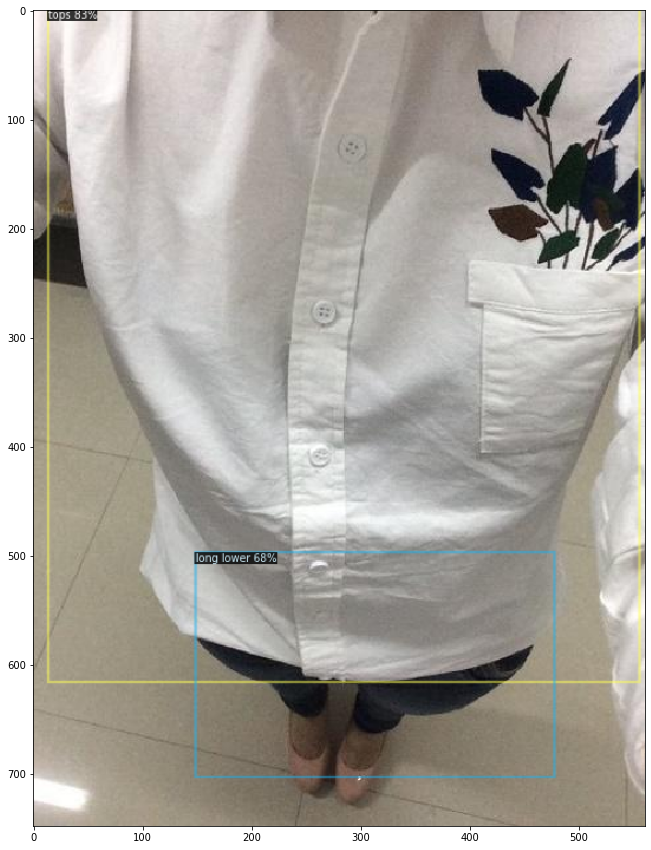

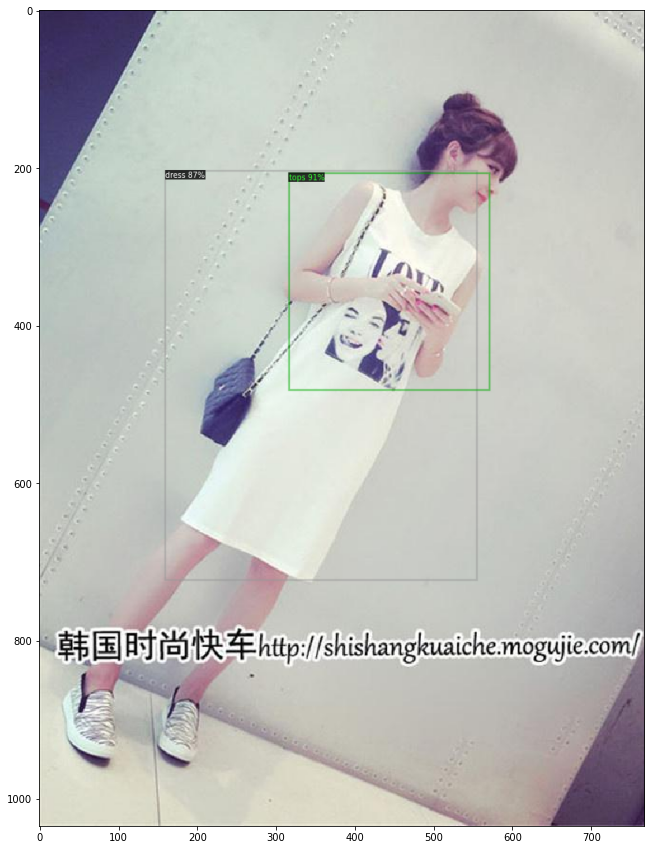

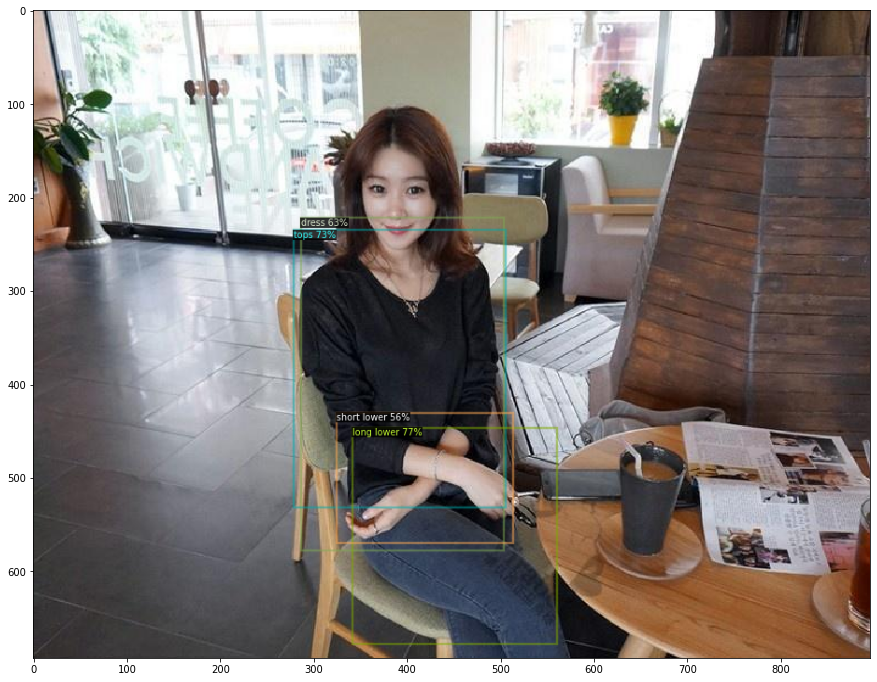

In [29]:
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread('/home/ubuntu/DeepFashion2/data/validation/image/'  + d["file_name"])
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (15,15))
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()

In [19]:
MetadataCatalog.get('train')

namespace(name='train',
          json_file='/home/ubuntu/DeepFashion2/deepfashion2_train_reduced.json',
          image_root='/home/ubuntu/DeepFashion2/data/train/image',
          evaluator_type='coco',
          thing_classes=['tops', 'short lower', 'long lower', 'dress'],
          thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2, 4: 3})

In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("yosAVMB47-Y", width=500)
display(video)

In [ ]:
!sudo apt install ffmpeg

In [ ]:
!youtube-dl https://www.youtube.com/watch?v=yosAVMB47-Y -f 22 -o video.mp4
!ffmpeg -i video.mp4 -t 00:01:00 -c:v copy min-clip.mp4

In [ ]:
from IPython.display import Video

Video("min-clip.mp4")

In [ ]:
from IPython.display import Video

Video("video-output.mkv", embed=True)

In [ ]:
# !wget https://img-lcwaikiki.mncdn.com/mnresize/1024/-//productimages/20201/1/3945185/l_20201-0sg016z8-cs8_a.jpg -O example.jpg
from detectron2.utils.visualizer import ColorMode
im = cv2.imread("test2.png")
outputs = predictor(im)

In [ ]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (20,20))
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()

In [ ]:
!python detectron2/demo/demo.py --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml --video-input min-clip.mp4 --confidence-threshold 0.55 --output video-output.mkv \
  --opts MODEL.WEIGHTS output/model_final.pth

In [ ]:
# Load model

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.55 # Set threshold for this model
cfg.MODEL.WEIGHTS = 'output/model_final.pth' # Set path model .pth
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13
predictor = DefaultPredictor(cfg)

In [ ]:
im = cv2.imread("example.jpg")
outputs = predictor(im)

In [ ]:
from matplotlib import pyplot as plt

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get('train'), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (20,20))
plt.imshow(v.get_image()[:, :, ::-1])
plt.show()

In [14]:
!pip install sk-video

  Using cached https://files.pythonhosted.org/packages/dd/3f/ce848b8b2062ad1ccf1449094a740c775f6c761339f411e44f1e090f23a7/sk_video-1.1.10-py2.py3-none-any.whl
    100% |████████████████████████████████| 25.9MB 1.7MB/s eta 0:00:01
You are using pip version 19.0.3, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
import skvideo.io  
videodata = skvideo.io.vread("min-clip.mp4")  

In [ ]:
plt.imshow(videodata[1000])
plt.show()

In [ ]:
i = 0
for im in videodata:
    if (i % 4 != 0):
        i += 1
        continue
    print(i)
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get('train'), scale=1.2)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    plt.figure(figsize = (15,15))
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()
    i += 1

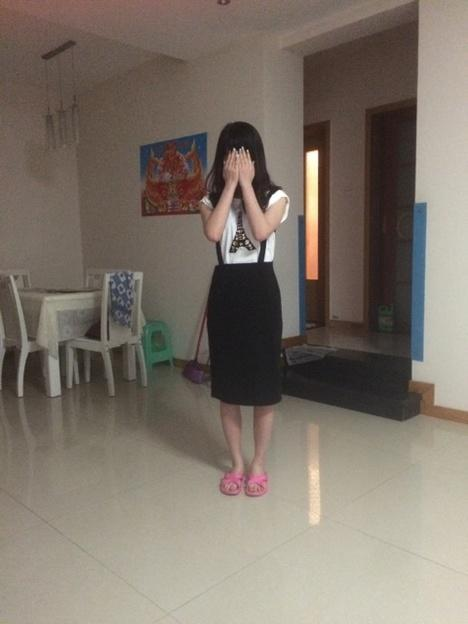

In [12]:
from IPython.display import Image
Image(filename='/home/ubuntu/DeepFashion2/data/validation/image/000001.jpg') 